(DrawingGraphs)=
# Drawing Graphs

>*Above all else show the data.*
>
>--Edward Tufte[^note1]

Visualising data is one of the most important tasks facing the data analyst. It's important for two distinct but closely related reasons. Firstly, there's the matter of drawing "presentation graphics": displaying your data in a clean, visually appealing fashion makes it easier for your reader to understand what you're trying to tell them. Equally important, perhaps even more important, is the fact that drawing graphs helps *you* to understand the data. To that end, it's important to draw "exploratory graphics" that help you learn about the data as you go about analysing it. These points might seem pretty obvious, but I cannot count the number of times I've seen people forget them.

[^note1]: The origin of this quote is Tufte's lovely book *The Visual Display of Quantitative Information*.

```{figure} ../img/graphics/snow_ghost_map2.png
:name: fig-ghostmap
:width: 600px
:align: center

A stylised redrawing of John Snow’s original cholera map. Each small dot represents the location of a cholera case, and each large circle shows the location of a well. As the plot makes clear, the cholera outbreak is centred very closely on the Broad St pump.

```

To give a sense of the importance of this chapter, I want to start with a classic illustration of just how powerful a good graph can be. To that end, {numref}`fig-ghostmap` shows a redrawing of one of the most famous data visualisations of all time: John Snow's 1854 map of cholera deaths. The map is elegant in its simplicity. In the background we have a street map, which helps orient the viewer. Over the top, we see a large number of small dots, each one representing the location of a cholera case. The larger symbols show the location of water pumps, labelled by name. Even the most casual inspection of the graph makes it very clear that the source of the outbreak is almost certainly the Broad Street pump. Upon viewing this graph, Dr Snow arranged to have the handle removed from the pump, ending the outbreak that had killed over 500 people. Such is the power of a good data visualisation.

The goals in this chapter are twofold: firstly, to discuss several fairly standard graphs that we use a lot when analysing and presenting data, and secondly, to show you how to create these graphs in Python. The graphs themselves tend to be pretty straightforward, so in that respect this chapter is pretty simple. Where people usually struggle is learning how to produce graphs, and especially, learning how to produce good graphs.[^note2] Fortunately, learning how to draw graphs in Python is reasonably simple, as long as you're not too picky about what your graph looks like. What I mean when I say this is that Python has a lot of good graphing functions, and most of the time you can produce a clean, high-quality graphic without having to learn very much about the low-level details of how Python handles graphics. Unfortunately, on those occasions when you do want to do something non-standard, or if you need to make highly specific changes to the figure, you actually do need to learn a fair bit about these details; and those details are both complicated and boring. With that in mind, the structure of this chapter is as follows: I'll start out by giving you a very quick overview of how graphics work in Python. I'll then discuss several different kinds of graph and how to draw them, as well as showing the basics of how to customise these plots. In a future version of this book, I intend to finish this chapter off by talking about what makes a good or a bad graph, but I haven't yet had the time to write that section.

[^note2]: I should add that this isn't unique to Python. Like everything in Python, there's a pretty steep learning curve to learning how to draw graphs, and like always there's a massive payoff at the end in terms of the quality of what you can produce. But to be honest, I've seen the same problems show up regardless of what system people use. I suspect that the hardest thing to do is to force yourself to take the time to think deeply about what your graphs are doing. I say that in full knowledge that only about half of my graphs turn out as well as they ought to. Understanding what makes a good graph is easy: actually designing a good graph is *hard*.

(graphics)=

## An overview of Python graphics

Reduced to its simplest form, you can think of a Python graphic as being much like a painting. You start out with an empty canvas. Every time you use a graphics function, it paints some new things onto your canvas. Later on, you can paint more things over the top if you want; but just like painting, you can't "undo" your strokes. If you make a mistake, you have to throw away your painting and start over. Fortunately, this is way more easy to do when using Python than it is when painting a picture in real life: you delete the plot and then type a new set of commands.[^note3] This way of thinking about drawing graphs is referred to as the **_painter's model_**. So far, this probably doesn't sound particularly complicated, and for the vast majority of graphs you'll want to draw it's exactly as simple as it sounds. Much like painting in real life, the headaches usually start when we dig into details. To see why, I'll  expand this "painting metaphor" a bit further just to show you the basics of what's going on under the hood, but before I do I want to stress that you really don't need to understand all these complexities in order to draw graphs. I'd been using Python for years before I even realised that most of these issues existed! However, I don't want you to go through the same pain I went through every time I inadvertently discovered one of these things, so here's a quick overview.

When you paint a picture, you need to paint it **with** something. Maybe you want to do an oil painting, but maybe you want to use watercolour. And, generally speaking, you pretty much have to pick one or the other. The analog to this in Python is a plotting library. A plotting library is a collection of commands about what to draw and where to draw it. In scientific plotting in Python, this usually comes down to something called [_matplotlib_](https://matplotlib.org). `Matplotlib` is a very powerful collection of paints and brushes that allows you to be quite creative and make some lovely and customized figures, but it can be a real pain to work with at times. Fortunately, there are ways to ease the pain. In this book, we will mostly produce figures with the library [_seaborn_](https://seaborn.pydata.org), whose purpose is to make it easier to produce statistical figures with `matplotlib`. `Seaborn` greatly simplifies the process of data visualization in Python, and this is why we will rely on it so heavily. `Seaborn`'s simplicity is both its strength and its weakness, however, and sooner or later, you will probably need to dip into `matplotlib` to make your painting just the way you want it. Luckily for us, because `seaborn` is built on top of `matplotlib`, using one doesn't rule out the other. In keeping with our painting analogy, perhaps we can think of `seaborn` a bit like a stencil, that lets us quickly make a nice image. But there's nothing to stop us from coloring outside the lines if we want to.

Thirdly, a painting is usually done in a particular **style**. Maybe it's a still life, maybe it's an impressionist piece, or maybe you're trying to annoy me by pretending that cubism is a legitimate artistic style. Regardless, each artistic style imposes some overarching aesthetic and perhaps even constraints on what can (or should) be painted using that style. `Seaborn` has an opinion about how plots should look, and how they should be created; it has a nice, clean style that I personally like, but it definitely is a style.

At this point, I think we've covered more than enough background material. The point that I'm trying to make by providing this discussion isn't to scare you with all these horrible details, but rather to try to convey to you the fact that Python doesn't really provide a single coherent graphics system. Instead, Python itself provides a platform, and different people have built different graphical tools using that platform. As a consequence of this fact, there's (once again!) many different ways to achieve the goal of drawing graphs with Python. At this stage you don't need to understand these complexities, but it's useful to know that they're there. For now, I think we can be happy with a simpler view of things: to the extent possible, we'll draw pictures using `seaborn`, and dip into `matplotlib` as needed.

So let's start painting.

[^note3]: Of course, if you are using something like a Jupyter notebook to write your code (and you are doing that, right?), this is even easier, since all you have to do is edit your script and then run it again.


(introplotting)=

## An introduction to plotting

Before I discuss any specialised graphics, let's start by drawing a few very simple graphs just to get a feel for what it's like to draw pictures using Python and `seaborn`. To that end, let's start by importing `seaborn`, and create a small list called `Fibonacci` that contains a few numbers we'd like Python to draw for us. The customary abbreviation for `seaborn` is `sns`, so let's use that. We'll use our list `Fibonacci` to provide the values for the y-axis, but of course, we'll need something for the x-axis as well. Since `Fibonacci` contains 7 digits, we'll create another list, `x`, which has increasing integers from 1 to 7. Then we'll use `seaborn` to plot the x and y axes against each other:

<AxesSubplot:>

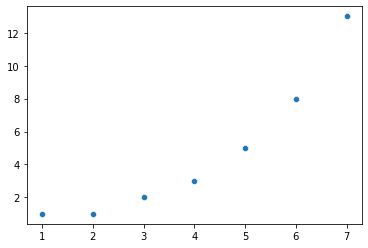

In [60]:
import seaborn as sns
fibonacci = [1,1,2,3,5,8,13]
x = [1,2,3,4,5,6,7]
sns.scatterplot(x = x, y = fibonacci)

Already, we can see `seaborn`'s opinion expressing itself in a variety of subtle ways. For example, it has chosen a size and color for the points in the scatterplot. These seem a little small to me, and while blue is a great color, I am partial to orange. So..

<AxesSubplot:>

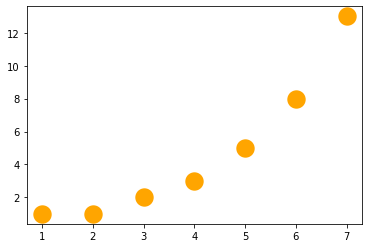

In [61]:
sns.scatterplot(x = x, y = fibonacci, s = 400, color = 'orange')

This is great, but a good figure should have a title, and axis labels. You would think this was straightforward. After all, shouldn't all figures have these things by default? After all, we're not making [Bezos charts](https://twitter.com/jsnell/status/481863414180896769) here, right? It's not quite as easy as you'd expect, but it's not so bad, either. The easiest way to add titles and labels to your figure is to first put your figure into a variable, and then `set` the title and axis labels of that variable. Sounds complicated, but it's ok, once you get used to it. By convention, the figure is called `ax`.[^note4]

Now that the figure is safely stored inside of `ax`, we can use `.set` to set the title and axis labels:

[^note4]: `ax` for "axis", I assume. I think this name harkens back to a different programming language, MATLAB, which inspired `pyplot`, which is part of `matplotlib`, which is... well, anyway... it's often called `ax`, ok?

[Text(0.5, 1.0, 'My first plot'),
 Text(0.5, 0, 'My x-axis'),
 Text(0, 0.5, 'My y-axis')]

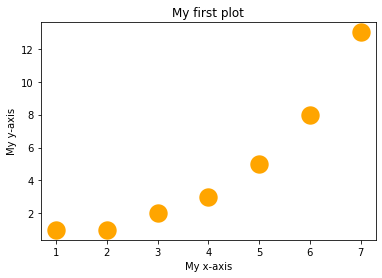

In [71]:
ax = sns.scatterplot(x = x, y = fibonacci, s = 400, color = 'orange')
ax.set(title = 'My first plot', xlabel = 'My x-axis', ylabel='My y-axis')